# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [102]:
# 1. LIBRARIES IMPORT
# 2. PRIMARY DATA OBSERVATION


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [2]:
# LEITURA INICIAL DOS DADOS

auto_industry = pd.read_csv('auto_industry.csv')
print("Data Sample:")
auto_industry.sample(10)

Data Sample:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
262,19.2,8,305.0,145.0,3425,13.2,78,usa,chevrolet monte carlo landau
81,28.0,4,97.0,92.0,2288,17.0,72,japan,datsun 510 (sw)
138,14.0,8,318.0,150.0,4457,13.5,74,usa,dodge coronet custom (sw)
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8
283,20.2,6,232.0,90.0,3265,18.2,79,usa,amc concord dl 6
270,21.1,4,134.0,95.0,2515,14.8,78,japan,toyota celica gt liftback
133,16.0,6,250.0,100.0,3781,17.0,74,usa,chevrolet chevelle malibu classic
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
120,19.0,4,121.0,112.0,2868,15.5,73,europe,volvo 144ea
109,21.0,4,140.0,72.0,2401,19.5,73,usa,chevrolet vega


In [3]:
# OBSERVAÇÃO INICIAL: COLUMNS DATATYPES
auto_industry.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [4]:
auto_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# OBSERVAÇÃO INICIAL: MEDIDAS DE DISPERÇÃO DOS ATRIBUTOS
auto_industry.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.17,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [9]:
# OBSERVAÇÃO INICIAL: FORMA DOS DATATYPES. EXISTE ALGUMA VARIÁVEL COM VALORES NULL, NAN OU ""?
print("Records:")
print(auto_industry.shape)

print("\n" + "=>> ISNA:")
print(auto_industry.isna().sum()) 

print("\n" + "=>> ISNULL:")
print(auto_industry.isnull().sum()) 

print("\n" + "=>>" ":")
np.where(auto_industry.applymap(lambda x: x== ' '))


Records:
(398, 9)

=>> ISNA:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>> ISNULL:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

=>>:


(array([], dtype=int64), array([], dtype=int64))

In [14]:
auto_industry['horsepower'] = auto_industry['horsepower'].fillna(auto_industry['horsepower'].mean()) 
print(auto_industry.shape)

(398, 9)


In [16]:
print(auto_industry.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [11]:
def validate_column_categorical(value):
    if type(value)==str and (re.search('[a-zA-Z]+',value)):
        return True
    return False

In [12]:
# VALIDATING COMPLETION OF CATEGORIC COLUMNS
auto_industry[['origin', 'name']].applymap(validate_column_categorical).value_counts()

origin  name
True    True    398
dtype: int64

## Calcule quantos modelos foram lançados em anos pares

In [117]:
auto_industry

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [23]:
models_launched_in_even_years = len(auto_industry[auto_industry['model_year']%2==0])

print(f"Models launched in even years: {models_launched_in_even_years}")

Models launched in even years: 214


## Crie uma coluna para a marca do veículo e outra para o nome

In [27]:
auto_industry[['brand', 'name']] = auto_industry.name.str.split(" ", 1,expand=True).rename(columns = {0: 'brand', 1: 'name'})

In [28]:
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford


## É posível identificar alguma relação entre mpg e acceleration?

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

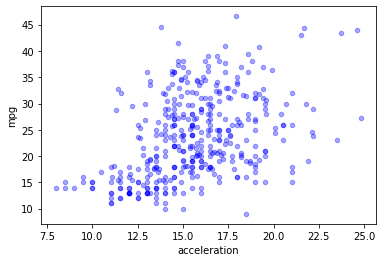

In [38]:
# OBSERVANDO POSSIVEL RELAÇÃO:
auto_industry.plot.scatter(x='acceleration', y='mpg', alpha = 0.35, color = 'blue')
#z = np.polyfit(x='acceleration', y='mpg', 2)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")
# QUANTO MAIS TEMPO É GASTO NA ACELERAÇÃO, MAIS PODER DE DESLOCAMENTO POR GALÃO. ACELERAÇÃO E MPG SÃO DIRETAMENTE PROPORCIONAIS

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [57]:
print('Total de carros fabricados com por cinlindros:')

print("USA:")
print(auto_industry.groupby('origin').get_group('usa').cylinders.value_counts(normalize = True));

print("Europe:")
print(auto_industry.groupby('origin').get_group('europe').cylinders.value_counts(normalize = True));

print("Japan:")
print(auto_industry.groupby('origin').get_group('japan').cylinders.value_counts(normalize = True));

print(auto_industry.cylinders.value_counts(normalize = False) )

Total de carros fabricados com por cinlindros:
USA:
8    0.413655
6    0.297189
4    0.289157
Name: cylinders, dtype: float64
Europe:
4    0.900000
6    0.057143
5    0.042857
Name: cylinders, dtype: float64
Japan:
4    0.873418
6    0.075949
3    0.050633
Name: cylinders, dtype: float64
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


In [55]:
#pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['origin'], columns=['cylinders'], values=['cylinders'], aggfunc=sum
#pivot_table_mpg

SyntaxError: invalid syntax (<ipython-input-55-6cf1b8e4790e>, line 2)

## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [58]:
auto_industry.drop_duplicates(inplace=True)

auto_industry['Km/L'] = auto_industry['mpg'] * 0.425

auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,usa,torino,ford,7.225


In [60]:
def capitalize_column(column):
    return column.capitalize()

In [61]:
auto_industry['origin'] = auto_industry['origin'].map(capitalize_column)
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevelle malibu,chevrolet,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,skylark 320,buick,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,satellite,plymouth,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,rebel sst,amc,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,torino,ford,7.225


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [63]:
#pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['model_year'], columns=['cylinders'], values=['mpg'], aggfunc=np.mean)
#pivot_table_mpg

In [65]:
pivot_table_mpg = pd.pivot_table(data=auto_industry, index=['model_year', 'cylinders'], values=['mpg'], aggfunc=np.mean)
pivot_table_mpg.head()

mpg
model_year cylinders           
70         4          25.285714
           6          20.500000
           8          14.111111
71         4          27.461538
           6          18.000000

In [79]:
print(f"3 Cilindros: {len(pivot_table_mpg.groupby('cylinders').get_group(3))}")
print(f"4 Cilindros: {len(pivot_table_mpg.groupby('cylinders').get_group(4))}")
print(f"5 Cilindros: {len(pivot_table_mpg.groupby('cylinders').get_group(5))}")
print(f"6 Cilindros: {len(pivot_table_mpg.groupby('cylinders').get_group(6))}")
print(f"8 Cilindros: {len(pivot_table_mpg.groupby('cylinders').get_group(8))}")

3 Cilindros: 4
4 Cilindros: 13
5 Cilindros: 3
6 Cilindros: 12
8 Cilindros: 11


In [80]:
# OBSERVAÇÕES: CARROS COM 3 CILINDROS NÃO ESTÃO PRESENTES EM TODOS OS ANOS DE LANÇAMENTO
#...

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [81]:
pivot_table_horsepower = pd.pivot_table(data=auto_industry, index=['origin', 'cylinders'], values=['horsepower'], aggfunc=np.mean)
pivot_table_horsepower

horsepower
origin cylinders            
Europe 4           79.141885
       5           82.333333
       6          113.500000
Japan  3           99.250000
       4           75.579710
       6          115.833333
Usa    4           81.936224
       6           99.736073
       8          158.300971

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

Usa       245
Japan      79
Europe     68
Name: origin, dtype: int64

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [87]:
auto_industry['region'] = auto_industry['origin'].replace({'Usa': 'America', 'Japan':'Asia', 'Europe': 'Europe'})

In [88]:
auto_industry

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L,region
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevelle malibu,chevrolet,7.650,America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,skylark 320,buick,6.375,America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,satellite,plymouth,7.650,America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,rebel sst,amc,6.800,America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,torino,ford,7.225,America
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,mustang gl,ford,11.475,America
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,pickup,vw,18.700,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,rampage,dodge,13.600,America
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ranger,ford,11.900,America


# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

In [90]:
auto_industry.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.000,17.5000,23.000,29.000,46.600
cylinders,398.0,5.454774,1.701004,3.000,4.0000,4.000,8.000,8.000
displacement,398.0,193.425879,104.269838,68.000,104.2500,148.500,262.000,455.000
horsepower,398.0,104.469388,38.199187,46.000,76.0000,95.000,125.000,230.000
weight,398.0,2970.424623,846.841774,1613.000,2223.7500,2803.500,3608.000,5140.000
acceleration,398.0,15.568090,2.757689,8.000,13.8250,15.500,17.175,24.800
model_year,398.0,76.010050,3.697627,70.000,73.0000,76.000,79.000,82.000
Km/L,398.0,9.993693,3.321793,3.825,7.4375,9.775,12.325,19.805


In [92]:
#auto_industry.applymap(np.mode()) -> Divida Técnica

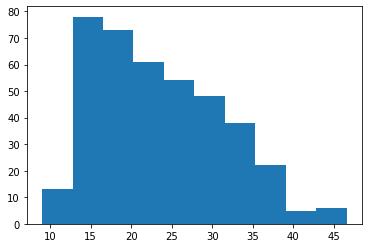

In [108]:
plt.hist(auto_industry['mpg'])

plt.show()

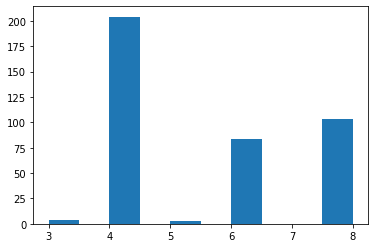

In [107]:
plt.hist(auto_industry['cylinders'])

plt.show()

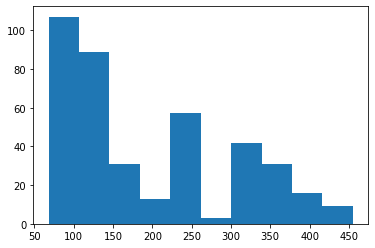

In [106]:
plt.hist(auto_industry['displacement'])

plt.show()

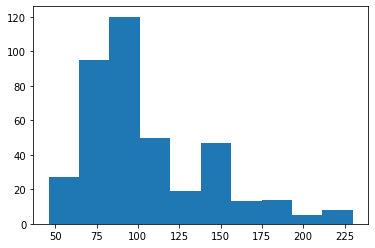

In [100]:
plt.hist(auto_industry['horsepower'])
plt.show()

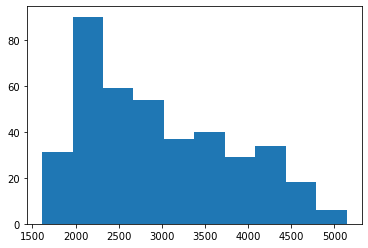

In [101]:
plt.hist(auto_industry['weight'])
plt.show()

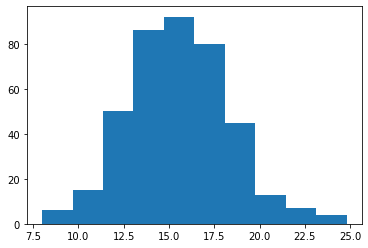

In [102]:
plt.hist(auto_industry['acceleration'])
plt.show()

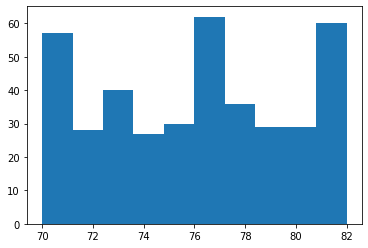

In [103]:
plt.hist(auto_industry['model_year'])
plt.show()

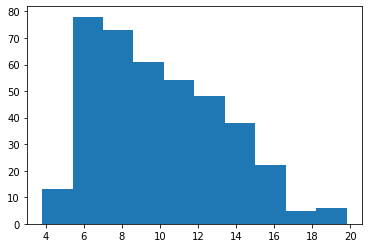

In [104]:
plt.hist(auto_industry['Km/L'])

plt.show()

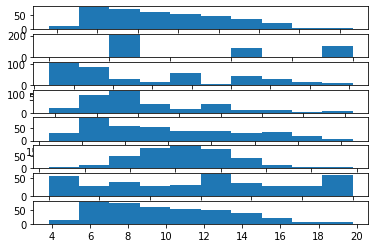

In [105]:
plt.subplot(8,1,1)
plt.hist(auto_industry['mpg'])

plt.subplot(8,1,2)
plt.hist(auto_industry['cylinders'])

plt.subplot(8,1,3)
plt.hist(auto_industry['displacement'])

plt.subplot(8,1,4)
plt.hist(auto_industry['horsepower'])

plt.subplot(8,1,5)
plt.hist(auto_industry['weight'])

plt.subplot(8,1,6)
plt.hist(auto_industry['acceleration'])

plt.subplot(8,1,7)
plt.hist(auto_industry['model_year'])

plt.subplot(8,1,8)
plt.hist(auto_industry['Km/L'])

plt.show()

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

In [112]:
#sns.pairplot(auto_industry)

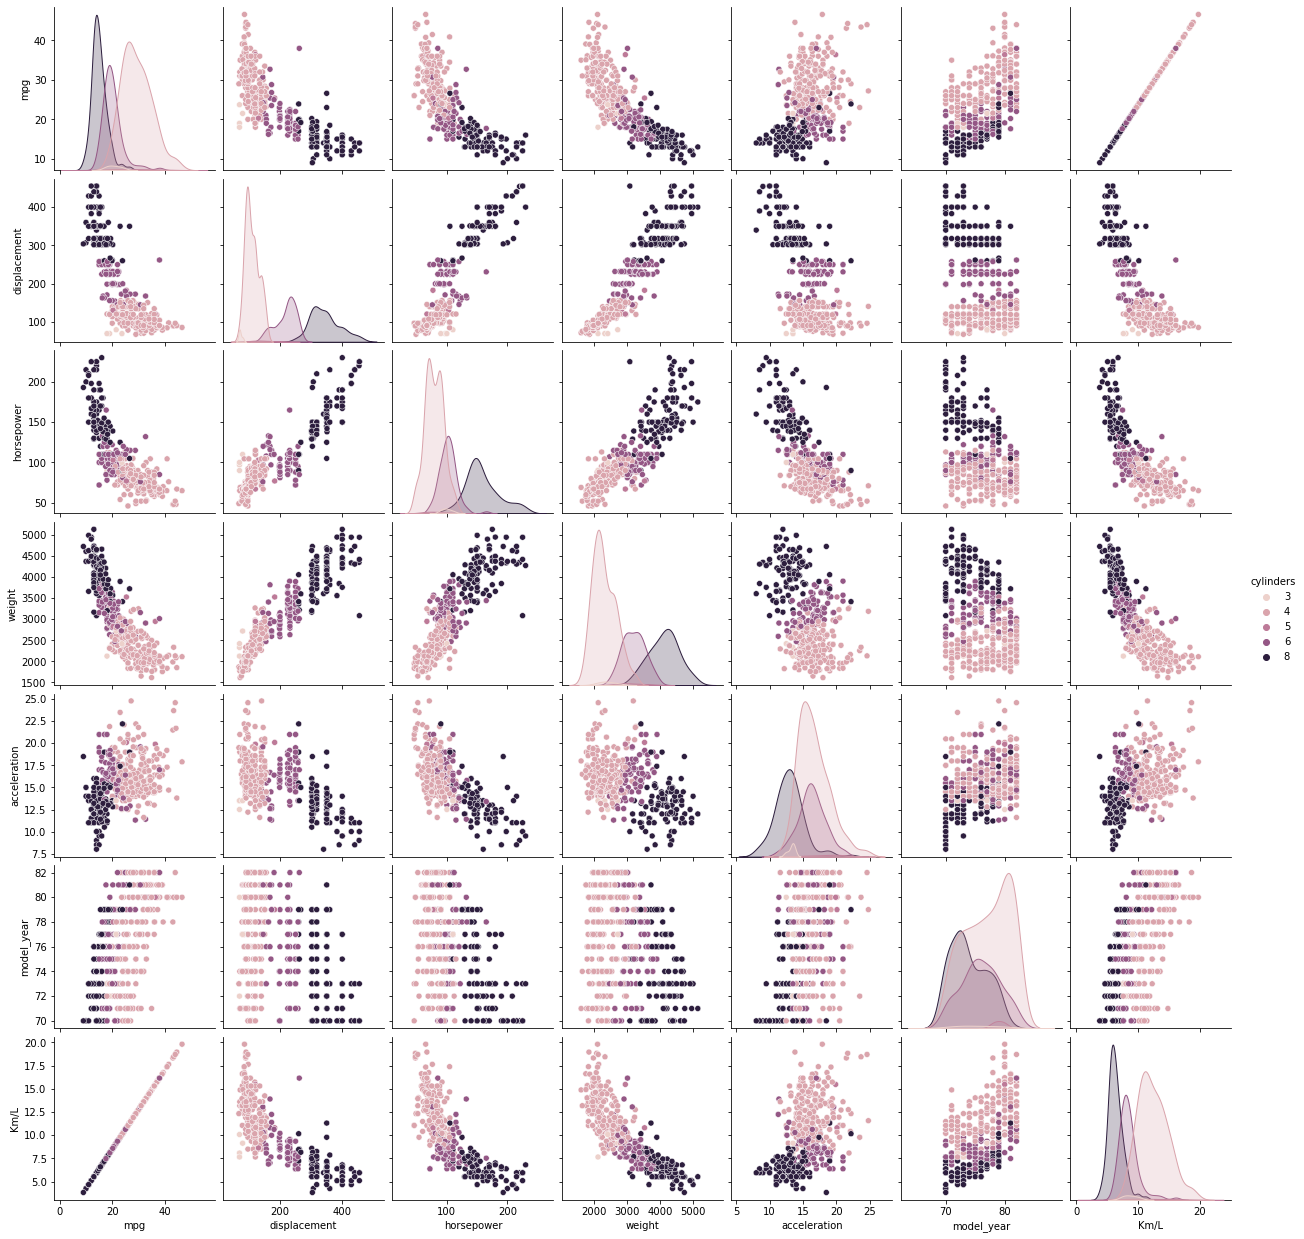

In [110]:
sns.pairplot(auto_industry, hue='cylinders')

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

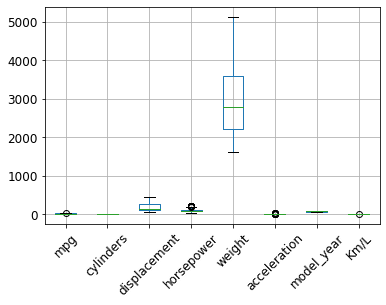

In [114]:
auto_industry.boxplot(column = ['mpg', 'cylinders','displacement','horsepower', 'weight', 'acceleration', 'model_year','Km/L'], rot=45, fontsize=12)
plt.show()

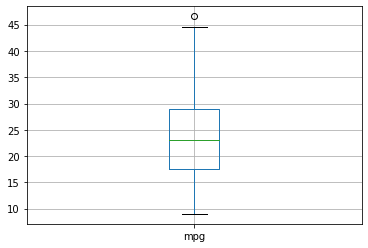

In [125]:
auto_industry.boxplot(column = 'mpg')
plt.show()

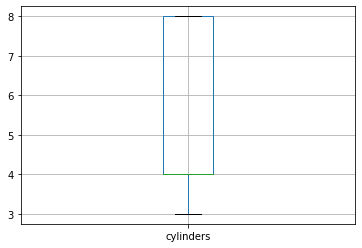

In [126]:
auto_industry.boxplot(column = 'cylinders')
plt.show()

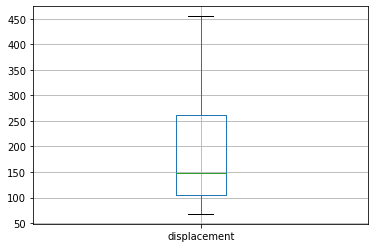

In [127]:
auto_industry.boxplot(column = 'displacement')
plt.show()

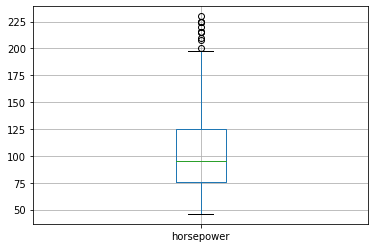

In [128]:
auto_industry.boxplot(column = ['horsepower'])
plt.show()

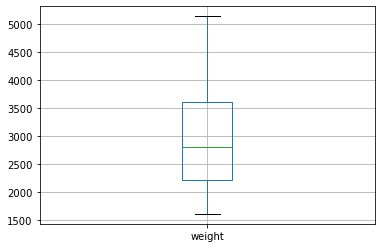

In [129]:
auto_industry.boxplot(column = ['weight'])
plt.show()

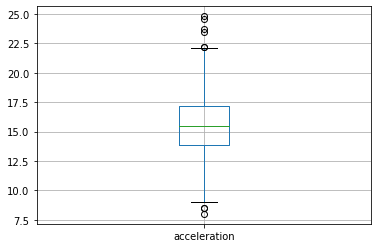

In [130]:
auto_industry.boxplot(column = ['acceleration'])
plt.show()

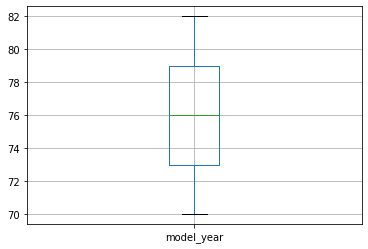

In [131]:
auto_industry.boxplot(column = ['model_year'])
plt.show()

In [ ]:

plt.show()

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 

In [119]:
auto_industry['w/hp'] = auto_industry['weight'] / auto_industry['horsepower']
auto_industry.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,Km/L,region,w/hp
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevelle malibu,chevrolet,7.650,America,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,skylark 320,buick,6.375,America,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,satellite,plymouth,7.650,America,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,rebel sst,amc,6.800,America,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,torino,ford,7.225,America,24.635714


<AxesSubplot:xlabel='w/hp', ylabel='Km/L'>

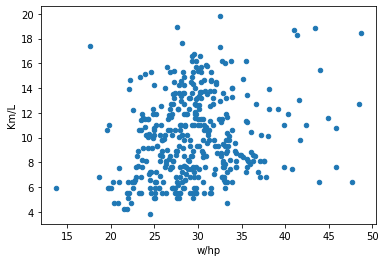

In [121]:
auto_industry.plot.scatter(x = 'w/hp', y = 'Km/L') 